this notebook include functions to calculate pair distances and sort accordingly

# imports

In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr,fisher_exact
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist
from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from SampleLists.SampleFileFunctions import *

import os
from Utils import cacheOnDisk
from queue.qp import qp,fakeqp
from addloglevels import sethandlers

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

done1
stop
stop
done1
stop
done
done


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate


'16052018'

In [3]:
print 'fgf'

fgf


# generate relevant sample lists:

In [4]:
# generate sample list of samples cleaned with MoBio:

file1='/net/mraid08/export/genie/Lab/ImmunologyProject/BD samples summary files/allBDnumbersWetAndSeqInfo_08042018.xlsx'
sampleFile=pd.read_excel(file1)

In [5]:
sampleFile.head()

,BD,BDindex,Study,#rows per BD,reg num,DNA extraction kit,Cleaned,Why not cleaned?,CleanUp plate,Well in CleanUp Plate,...,PNP490,PNP515,Cardio91,reseqPlate2,reseqPlate3,StudyTypeID,Relations,Sample Comments,inSeqPipeline,data analysis comments
0,BD1,1,PNP,1,NaN,PureGene,1,NaN,Plate 1,A1,...,1,1,0,0,0,1.0,NaN,NaN,1,NaN
1,BD2,2,PNP,1,NaN,PureGene,1,NaN,Plate 1,B1,...,1,1,0,0,0,1.0,NaN,NaN,1,NaN
2,BD3,3,PNP,1,NaN,PureGene,1,NaN,Plate 1,C1,...,1,1,0,0,0,1.0,NaN,NaN,1,NaN
3,BD4,4,PNP,1,NaN,PureGene,1,NaN,Plate 1,D1,...,1,1,0,0,0,1.0,NaN,NaN,1,NaN
4,BD5,5,PNP,1,NaN,PureGene,1,NaN,Plate 1,E1,...,1,1,0,0,0,1.0,"son of BD690(121123),don’t live together",NaN,1,NaN


In [6]:
MoBioPNP515=sampleFile[(sampleFile['CleanUpKit']=='MoBio (QIAGEN) MagAttract cleaning kit')&\
(sampleFile['PNP515']==1)]

In [7]:
MoBioSamples=list(MoBioPNP515['BD'].unique())
print len(MoBioSamples)
MoBioSamples[:10]

443


[u'BD58',
 u'BD66',
 u'BD70',
 u'BD71',
 u'BD84',
 u'BD113',
 u'BD118',
 u'BD121',
 u'BD125',
 u'BD127']

# load score table:

In [8]:
#load coloring table:
file1='%s/Sample files/PNP515-relationshipsScoring' %MyPath
PNP515samplePairScoring2=pd.read_pickle(file1)
PNP515samplePairScoring2.head()

,sample1,sample2,samplePair,Relations_sample1,RelGroup_sample1,SameGroup_sample1,BloodGroup_sample1,Relations_sample2,RelGroup_sample2,SameGroup_sample2,BloodGroup_sample2,sameScore,bloodScore,environmentalScore,TotalScore,RelGroupColor,BloodGroupColor,SameGroupColor,TotalScoreColor
0,BD438,BD690,"(BD438, BD690)",NaN,NaN,NaN,NaN,"mother of BD5(462009),don’t live together",30.0,NaN,17.0,0,0,0,0,0,0,0,0
1,BD438,BD912,"(BD438, BD912)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
2,BD438,BD8,"(BD438, BD8)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,BD438,BD101,"(BD101, BD438)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
4,BD438,BD836,"(BD438, BD836)",NaN,NaN,NaN,NaN,husband of BD785(458933),44.0,NaN,NaN,0,0,0,0,0,0,0,0


In [9]:
PNP515samplePairScoring2[PNP515samplePairScoring2['samplePair']==('BD937','BD938')]

,sample1,sample2,samplePair,Relations_sample1,RelGroup_sample1,SameGroup_sample1,BloodGroup_sample1,Relations_sample2,RelGroup_sample2,SameGroup_sample2,BloodGroup_sample2,sameScore,bloodScore,environmentalScore,TotalScore,RelGroupColor,BloodGroupColor,SameGroupColor,TotalScoreColor
39840,BD938,BD937,"(BD937, BD938)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


# check TCR and Mb distance matrices:

## PNP515 dataset:

In [ ]:
#load TCR condensed distance table:
datasetFolder='%s/TCR_real_data' %MyPath
datasetName='PNP515'
distMetricRA='braycurtis'
topNseqs=None
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=None
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder

TCRdf_RA_distMat_file_condensed='%s/distMat_RA_%s_topNseqs%s_OLstd%s_condensed' %(distMatFolder,distMetricRA,topNseqs,outlierSTDtcr)
TCR_cond=pd.read_pickle(TCRdf_RA_distMat_file_condensed)
print TCR_cond.sort_values(by='dist').head(10)

MbDF_RA_distMat_file_condensed='%s/distMat_MbDF_RA_%s_topNspecies%s_OLstd%s_libPrep%s_condensed' %(distMatFolderMb,
                                                        distMetricRA,topNspecies,outlierSTDmb,libPrepMethod)
Mb_cond=pd.read_pickle(MbDF_RA_distMat_file_condensed)
print Mb_cond.sort_values(by='dist').head(10)

In [ ]:
TCR_cond['dist'].describe()

In [ ]:
TCR_cond['sample1'].unique()[:50]

In [ ]:
Mb_cond['dist'].describe()

In [ ]:
merged=pd.merge(TCR_cond,Mb_cond,how='inner',left_on=['sample1','sample2'],right_on=['sample1','sample2'])
print len(TCR_cond)
print len(Mb_cond)
print len(merged)
merged.head()

In [ ]:
# generate samplePair column:
merged['samplePair']=list([tuple(sorted(l)) for l in zip(merged['sample1'],merged['sample2'])])
merged=merged.rename(columns={'dist_x':'dist_TCR','dist_y':'dist_Mb'})
merged.head()

In [ ]:
#check same-person couples in dataset:
print 'checking for same-person pairs within the dataset:'
samePairs=[('BD474','BD840'),('BD617','BD838'),('BD937','BD938'),('BD705','BD714')]


for samplePair in samePairs:
    if samplePair in list(merged['samplePair']):
        print 'the sample pair %s and %s are in the dataset' %(samplePair[0],samplePair[1])
    else:
        print 'the sample pair %s and %s IS NOT in the dataset' %(samplePair[0],samplePair[1])
    
    
#     if (samplePair[0] in sampleList) and  (samplePair[1] in sampleList):
#         print 'the sample pair %s and %s are in the dataset' %(samplePair[0],samplePair[1])
#     elif samplePair[0] in sampleList:
#         print 'only sample %s is in the dataset' %samplePair[0]
#     elif samplePair[1] in sampleList:
#         print 'only sample %s is in the dataset' %samplePair[1]

In [ ]:
merged_withColors=pd.merge(merged,PNP515samplePairScoring2,how='left',left_on=['samplePair'],right_on=['samplePair'])
merged_withColors.head()

# plot correlation:

In [ ]:
fig,ax=plt.subplots()
colorList=['grey','black','blue','red']

x = merged_withColors['dist_TCR']
y = merged_withColors['dist_Mb']
r_pears, p_pears = MyPearsonr(x, y)
r_spear, p_spear = MySpearmanr(x, y)
# ax.scatter(x, y, color='grey', alpha=0.2)
xmax = round(np.max(x) * 1.05, 4)
ymax = round(np.max(y) * 1.05, 4)
xmin = round(np.min(x) * 0.95, 4)
ymin = round(np.min(y) * 0.95, 4)


for n in range(4):
    print n, colorList[n]
    scored=merged_withColors[merged_withColors['TotalScore']==n]
    x = scored['dist_TCR']
    y = scored['dist_Mb']
    ax.scatter(x, y, color=colorList[n],alpha=0.2*n+0.1,s=40*n+5)
    if n==3:
        for ind in scored.index:
            xpoint = scored.loc[ind,'dist_TCR']
            ypoint = scored.loc[ind,'dist_Mb']
            samplePair=scored.loc[ind,'samplePair']
            ax.annotate(samplePair,xy=(xpoint,ypoint),xytext=(xpoint*1.05,ypoint*1.05),fontsize=8)

ax.annotate('pearson:r=%s,p=%s\nspearman:r=%s,p=%s\nn=%s' % (round(r_pears, 2), round(p_pears, 6),
                                                             round(r_spear, 2), round(p_spear, 6),
                                                             len(x)), xy=(0.16, 0.83), xycoords='axes fraction', fontsize=16)
# ax.annotate(stats.spearmanr(x,y), xy=(0.16, 0.83), xycoords='axes fraction',fontsize=16)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('dist_TCR')
ax.set_ylabel('dist_Mb')
ax.set_title('TCR-Mb distance correlation\nTCRdataset=%s,distanceMetric=%s,topNseqs=%s,topNspecies=%s' %(datasetName,
                                                                distMetricRA,topNseqs,topNspecies),fontsize=20)
ax.margins(0.2)
plot_bestFitLine(x, y, ax, color='black')

In [ ]:
plt.show()

## define function:


In [12]:
def plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,
                                       outlierSTDtcr,outlierSTDmb,topNspecies,libPrepMethod,removeSamePerson=False,
                                       removeLastSamples=False,filteringList=None,distanceOutlierSTD=None):
    
    print 'loading files:'
    distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
    distMatFolder='%s/distanceMatrices' %datasetFolder
    
    if distMetricRA=='braycurtis':

        TCRdf_RA_distMat_file_condensed='%s/distMat_RA_%s_topNseqs%s_OLstd%s_condensed' %(distMatFolder,distMetricRA,topNseqs,outlierSTDtcr)
        TCR_cond=pd.read_pickle(TCRdf_RA_distMat_file_condensed)

        MbDF_RA_distMat_file_condensed='%s/distMat_MbDF_RA_%s_topNspecies%s_OLstd%s_libPrep%s_condensed' %(distMatFolderMb,
                                                                distMetricRA,topNspecies,outlierSTDmb,libPrepMethod)
        Mb_cond=pd.read_pickle(MbDF_RA_distMat_file_condensed)
        
        
    else:
        TCRdf_RA_distMat_file_condensed='%s/distMat_binary_%s_topNseqs%s_condensed' %(distMatFolder,distMetricRA,topNseqs)
                                                                                      
        TCR_cond=pd.read_pickle(TCRdf_RA_distMat_file_condensed)

        MbDF_RA_distMat_file_condensed='%s/distMat_MbDF_binary_%s_topNspecies%s_libPrep%s_condensed' %(distMatFolderMb,
                                                                distMetricRA,topNspecies,libPrepMethod)
        Mb_cond=pd.read_pickle(MbDF_RA_distMat_file_condensed)
    
    TCR_cond['sample1']=TCR_cond['sample1'].str.replace('b','')
    TCR_cond['sample2']=TCR_cond['sample2'].str.replace('b','')
        
        
        
    if removeLastSamples:
        print 'TCR_cond length before removing last samples removal is %s' %len(TCR_cond) 
        TCR_cond=TCR_cond[TCR_cond['sample1'].str.replace('BD','').astype(int)<936]
        TCR_cond=TCR_cond[TCR_cond['sample2'].str.replace('BD','').astype(int)<936]
        print 'TCR_cond length AFTER removing last samples removal is %s' %len(TCR_cond)
    
    if filteringList is not None:
        print 'TCR_cond length before filtering with filteringList is %s' %len(TCR_cond) 
        TCR_cond=TCR_cond[(TCR_cond.sample1.isin(filteringList))&(TCR_cond.sample2.isin(filteringList))]
        
        print 'TCR_cond length After filtering with filteringList is %s' %len(TCR_cond)
      
    merged=pd.merge(TCR_cond,Mb_cond,how='inner',left_on=['sample1','sample2'],right_on=['sample1','sample2'])
    print len(TCR_cond)
    print len(Mb_cond)
    print len(merged)        

    # generate samplePair column:
    merged['samplePair']=list([tuple(sorted(l)) for l in zip(merged['sample1'],merged['sample2'])])
    merged=merged.rename(columns={'dist_x':'dist_TCR','dist_y':'dist_Mb'})
    
    if distanceOutlierSTD is not None:
        print 'filtering distanceOutliers...'
        merged=filter_outliers(df=merged, outlierSTD=distanceOutlierSTD, columnList=['dist_TCR','dist_Mb'])


    #check same-person couples in dataset:
    print 'checking for same-person pairs within the dataset:'
    samePairs=[('BD474','BD840'),('BD617','BD838'),('BD937','BD938'),('BD705','BD714')]


    for samplePair in samePairs:
        if samplePair in list(merged['samplePair']):
            print 'the sample pair %s and %s are in the dataset' %(samplePair[0],samplePair[1])
            if removeSamePerson:
                print 'df length before samePerson removal is %s' %len(merged)
                merged=merged[merged['samplePair']!=samplePair]
                print 'df length After samePerson removal is %s' %len(merged)
                
        else:
            print 'the sample pair %s and %s IS NOT in the dataset' %(samplePair[0],samplePair[1])
    print merged.head()
    merged_withColors=pd.merge(merged,PNP515samplePairScoring2,how='left',left_on=['samplePair'],right_on=['samplePair'])

    fig,ax=plt.subplots()
    colorList=['grey','black','blue','red']
    
    x = merged_withColors['dist_TCR']
    y = merged_withColors['dist_Mb']
    plot_bestFitLine(x, y, ax, color='black')
    r_pears, p_pears = MyPearsonr(x, y)
    r_spear, p_spear = MySpearmanr(x, y)
    # ax.scatter(x, y, color='grey', alpha=0.2)
    xmax = round(np.max(x) * 1.05, 4)
    ymax = round(np.max(y) * 1.05, 4)
    xmin = round(np.min(x) * 0.95, 4)
    ymin = round(np.min(y) * 0.95, 4)


    for n in range(4):
#         print n, colorList[n]
        scored=merged_withColors[merged_withColors['TotalScore']==n]
        x = scored['dist_TCR']
        y = scored['dist_Mb']
        ax.scatter(x, y, color=colorList[n],alpha=0.2*n+0.1,s=40*n+5)
        for i in scored.index:
            if scored.loc[i,'dist_TCR']<0.85:
                ax.scatter(scored.loc[i,'dist_TCR'], scored.loc[i,'dist_Mb'], color=colorList[n],alpha=0.2*n+0.1,s=40*n+20)
                
        if n==3:
            for ind in scored.index:
                xpoint = scored.loc[ind,'dist_TCR']
                ypoint = scored.loc[ind,'dist_Mb']
                samplePair=scored.loc[ind,'samplePair']
                ax.annotate(samplePair,xy=(xpoint,ypoint),xytext=(xpoint*1.05,ypoint*1.05),fontsize=9)

    ax.annotate('pearson:r=%s,p=%s\nspearman:r=%s,p=%s\nn=%s' % (round(r_pears, 2), round(p_pears, 6),
                                                                 round(r_spear, 2), round(p_spear, 6),
                                                                 len(x)), xy=(0.16, 0.83), xycoords='axes fraction', fontsize=16)
    # ax.annotate(stats.spearmanr(x,y), xy=(0.16, 0.83), xycoords='axes fraction',fontsize=16)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('dist_TCR')
    ax.set_ylabel('dist_Mb')
    ax.set_title('TCR-Mb distance correlation\nTCRdataset=%s,distanceMetric=%s,\ntopNseqs=%s,topNspecies=%s' %(datasetName,
                                                                    distMetricRA,topNseqs,topNspecies),fontsize=16)
    ax.margins(0.2)
    

#     plt.show()

    return ax

## PNP515_ss9000:

### no top sequence filter:

loading files:
119805
99681
90100
checking for same-person pairs within the dataset:
the sample pair BD474 and BD840 IS NOT in the dataset
the sample pair BD617 and BD838 are in the dataset
the sample pair BD937 and BD938 IS NOT in the dataset
the sample pair BD705 and BD714 IS NOT in the dataset
   dist_TCR sample1 sample2   dist_Mb    samplePair
0  0.985251     BD1    BD10  0.268982   (BD1, BD10)
1  0.991714     BD1   BD101  0.188633  (BD1, BD101)
2  0.987006     BD1   BD105  0.305714  (BD1, BD105)
3  0.987261     BD1   BD106  0.321190  (BD1, BD106)
4  0.989029     BD1   BD107  0.280123  (BD1, BD107)


/usr/wisdom/python/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


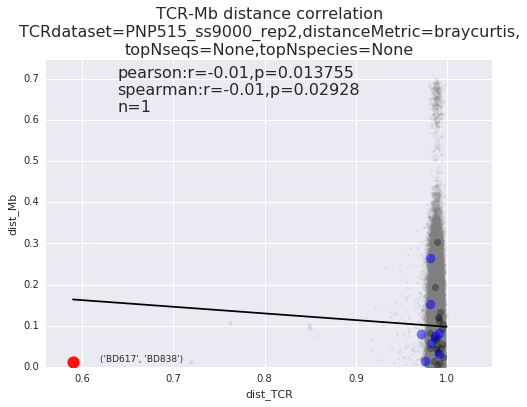

In [13]:
#no sequence filtering, braycurtis


datasetFolder='%s/TCR_real_data/SubSampled9000data_rep2' %MyPath
datasetName='PNP515_ss9000_rep2'
distMetricRA='braycurtis'
topNseqs=None
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=None
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod)
plt.show()

loading files:
119805
99681
90100
checking for same-person pairs within the dataset:
the sample pair BD474 and BD840 IS NOT in the dataset
the sample pair BD617 and BD838 are in the dataset
df length before samePerson removal is 90100
df length After samePerson removal is 90099
the sample pair BD937 and BD938 IS NOT in the dataset
the sample pair BD705 and BD714 IS NOT in the dataset
   dist_TCR sample1 sample2   dist_Mb    samplePair
0  0.985251     BD1    BD10  0.268982   (BD1, BD10)
1  0.991714     BD1   BD101  0.188633  (BD1, BD101)
2  0.987006     BD1   BD105  0.305714  (BD1, BD105)
3  0.987261     BD1   BD106  0.321190  (BD1, BD106)
4  0.989029     BD1   BD107  0.280123  (BD1, BD107)


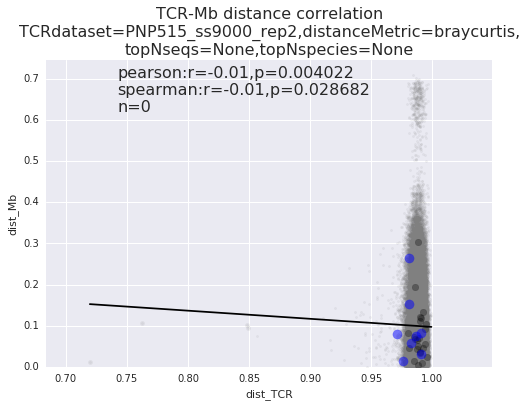

In [14]:
#no sequence filtering, braycurtis


datasetFolder='%s/TCR_real_data/SubSampled9000data_rep2' %MyPath
datasetName='PNP515_ss9000_rep2'
distMetricRA='braycurtis'
topNseqs=None
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=None
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod,removeSamePerson=True,removeLastSamples=False)
plt.show()

loading files:
TCR_cond length before filtering with filteringList is 119805
TCR_cond length After filtering with filteringList is 87153
87153
99681
64261
checking for same-person pairs within the dataset:
the sample pair BD474 and BD840 IS NOT in the dataset
the sample pair BD617 and BD838 are in the dataset
df length before samePerson removal is 64261
df length After samePerson removal is 64260
the sample pair BD937 and BD938 IS NOT in the dataset
the sample pair BD705 and BD714 IS NOT in the dataset
   dist_TCR sample1 sample2   dist_Mb      samplePair
0  0.990710   BD113   BD118  0.065495  (BD113, BD118)
1  0.986382   BD113   BD125  0.141659  (BD113, BD125)
2  0.991610   BD113   BD127  0.133213  (BD113, BD127)
3  0.987876   BD113   BD145  0.028842  (BD113, BD145)
4  0.985353   BD113   BD146  0.038470  (BD113, BD146)


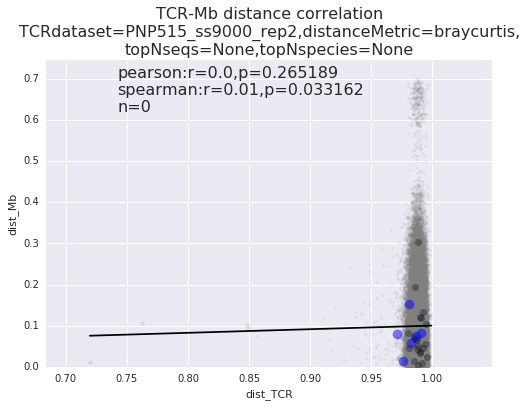

In [15]:
#no sequence filtering, braycurtis


datasetFolder='%s/TCR_real_data/SubSampled9000data_rep2' %MyPath
datasetName='PNP515_ss9000_rep2'
distMetricRA='braycurtis'
topNseqs=None
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=None
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,
                                      outlierSTDtcr,outlierSTDmb,topNspecies,libPrepMethod,
                                      removeSamePerson=True,removeLastSamples=False,filteringList=MoBioSamples)
plt.show()

loading files:
TCR_cond length before filtering with filteringList is 119805
TCR_cond length After filtering with filteringList is 87153
87153
99681
64261
filtering distanceOutliers...
checking for same-person pairs within the dataset:
the sample pair BD474 and BD840 IS NOT in the dataset
the sample pair BD617 and BD838 are in the dataset
df length before samePerson removal is 64261
df length After samePerson removal is 64260
the sample pair BD937 and BD938 IS NOT in the dataset
the sample pair BD705 and BD714 IS NOT in the dataset
   dist_TCR sample1 sample2   dist_Mb      samplePair
0  0.990710   BD113   BD118  0.065495  (BD113, BD118)
1  0.986382   BD113   BD125  0.141659  (BD113, BD125)
2  0.991610   BD113   BD127  0.133213  (BD113, BD127)
3  0.987876   BD113   BD145  0.028842  (BD113, BD145)
4  0.985353   BD113   BD146  0.038470  (BD113, BD146)


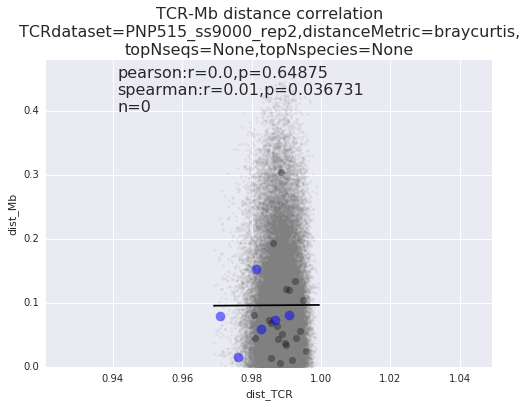

In [16]:
#no sequence filtering, braycurtis


datasetFolder='%s/TCR_real_data/SubSampled9000data_rep2' %MyPath
datasetName='PNP515_ss9000_rep2'
distMetricRA='braycurtis'
topNseqs=None
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=None
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,
                                      outlierSTDtcr,outlierSTDmb,topNspecies,libPrepMethod,
                                      removeSamePerson=True,removeLastSamples=False,filteringList=MoBioSamples,
                                     distanceOutlierSTD=4)
plt.show()

loading files:
119805
99681
90100
checking for same-person pairs within the dataset:
the sample pair BD474 and BD840 IS NOT in the dataset
the sample pair BD617 and BD838 are in the dataset
df length before samePerson removal is 90100
df length After samePerson removal is 90099
the sample pair BD937 and BD938 IS NOT in the dataset
the sample pair BD705 and BD714 IS NOT in the dataset
   dist_TCR sample1 sample2   dist_Mb    samplePair
0  0.985251     BD1    BD10  0.527273   (BD1, BD10)
1  0.991714     BD1   BD101  0.480315  (BD1, BD101)
2  0.987006     BD1   BD105  0.454545  (BD1, BD105)
3  0.987261     BD1   BD106  0.490566  (BD1, BD106)
4  0.989029     BD1   BD107  0.452991  (BD1, BD107)


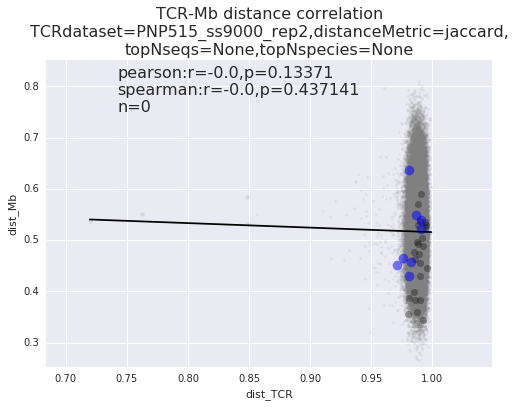

In [17]:
#no sequence filtering, jaccard


datasetFolder='%s/TCR_real_data/SubSampled9000data_rep2' %MyPath
datasetName='PNP515_ss9000_rep2'
distMetricRA='jaccard'
topNseqs=None
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=None
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod,removeSamePerson=True,removeLastSamples=False)

plt.show()

#### generate plot for TCR distance only:

In [45]:
datasetFolder='%s/TCR_real_data' %MyPath
datasetName='PNP515'
distMetricRA='jaccard'
topNseqs=None
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=None
libPrepMethod=None

In [46]:
distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder
    
if distMetricRA=='braycurtis':

    TCRdf_RA_distMat_file_condensed='%s/distMat_RA_%s_topNseqs%s_OLstd%s_condensed' %(distMatFolder,distMetricRA,topNseqs,outlierSTDtcr)
    TCR_cond=pd.read_pickle(TCRdf_RA_distMat_file_condensed)
else:
    TCRdf_RA_distMat_file_condensed='%s/distMat_binary_%s_topNseqs%s_condensed' %(distMatFolder,distMetricRA,topNseqs)
    TCR_cond=pd.read_pickle(TCRdf_RA_distMat_file_condensed)


In [47]:
distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder
    
if distMetricRA=='braycurtis':
        MbDF_RA_distMat_file_condensed='%s/distMat_MbDF_RA_%s_topNspecies%s_OLstd%s_libPrep%s_condensed' %(distMatFolderMb,
                                                                distMetricRA,topNspecies,outlierSTDmb,libPrepMethod)
        Mb_cond=pd.read_pickle(MbDF_RA_distMat_file_condensed)
        
        
else:
        MbDF_RA_distMat_file_condensed='%s/distMat_MbDF_binary_%s_topNspecies%s_libPrep%s_condensed' %(distMatFolderMb,
                                                                distMetricRA,topNspecies,libPrepMethod)
        Mb_cond=pd.read_pickle(MbDF_RA_distMat_file_condensed)


In [48]:
 TCR_cond.head()

,dist,sample1,sample2
0,0.933753,BD1,BD10
1,0.970327,BD1,BD101
2,0.937233,BD1,BD105
3,0.935418,BD1,BD106
4,0.939356,BD1,BD107


In [49]:
 TCR_cond.dist.describe()

count    132355.000000
mean          0.959272
std           0.015688
min           0.490694
25%           0.949570
50%           0.960225
75%           0.970002
max           1.000000
Name: dist, dtype: float64

In [50]:
Mb_cond.dist.describe()

count    99681.000000
mean         0.514884
std          0.075869
min          0.229508
25%          0.461538
50%          0.508621
75%          0.563025
max          0.810811
Name: dist, dtype: float64

In [51]:
# generate samplePair column:
TCR_cond['samplePair']=list([tuple(sorted(l)) for l in zip(TCR_cond['sample1'],TCR_cond['sample2'])])
TCR_cond=TCR_cond.rename(columns={'dist_x':'dist_TCR','dist_y':'dist_Mb'})


#check same-person couples in dataset:
print 'checking for same-person pairs within the dataset:'
samePairs=[('BD617','BD838'),('BD705','BD714')]


for samplePair in samePairs:
    if samplePair in list(TCR_cond['samplePair']):
        print 'the sample pair %s and %s are in the dataset' %(samplePair[0],samplePair[1])
    else:
        print 'the sample pair %s and %s IS NOT in the dataset' %(samplePair[0],samplePair[1])

TCR_cond_withColors=pd.merge(TCR_cond,PNP515samplePairScoring2,how='left',left_on=['samplePair'],right_on=['samplePair'])

checking for same-person pairs within the dataset:
the sample pair BD617 and BD838 are in the dataset
the sample pair BD705 and BD714 are in the dataset


In [52]:
# generate samplePair column:
Mb_cond['samplePair']=list([tuple(sorted(l)) for l in zip(Mb_cond['sample1'],Mb_cond['sample2'])])
Mb_cond=Mb_cond.rename(columns={'dist_x':'dist_Mb','dist_y':'dist_Mb'})


#check same-person couples in dataset:
print 'checking for same-person pairs within the dataset:'
samePairs=[('BD617','BD838'),('BD705','BD714')]


for samplePair in samePairs:
    if samplePair in list(Mb_cond['samplePair']):
        print 'the sample pair %s and %s are in the dataset' %(samplePair[0],samplePair[1])
    else:
        print 'the sample pair %s and %s IS NOT in the dataset' %(samplePair[0],samplePair[1])

Mb_cond_withColors=pd.merge(Mb_cond,PNP515samplePairScoring2,how='left',left_on=['samplePair'],right_on=['samplePair'])

checking for same-person pairs within the dataset:
the sample pair BD617 and BD838 are in the dataset
the sample pair BD705 and BD714 IS NOT in the dataset


In [53]:
TCR_cond_withColors.head()

,dist,sample1_x,sample2_x,samplePair,sample1_y,sample2_y,Relations_sample1,RelGroup_sample1,SameGroup_sample1,BloodGroup_sample1,...,SameGroup_sample2,BloodGroup_sample2,sameScore,bloodScore,environmentalScore,TotalScore,RelGroupColor,BloodGroupColor,SameGroupColor,TotalScoreColor
0,0.933753,BD1,BD10,"(BD1, BD10)",BD1,BD10,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
1,0.970327,BD1,BD101,"(BD1, BD101)",BD101,BD1,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
2,0.937233,BD1,BD105,"(BD1, BD105)",BD1,BD105,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
3,0.935418,BD1,BD106,"(BD1, BD106)",BD106,BD1,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
4,0.939356,BD1,BD107,"(BD1, BD107)",BD1,BD107,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


0
1
2
3


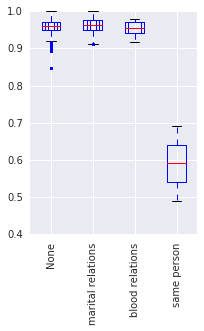

In [63]:
fig,ax=plt.subplots(figsize=(3,4))
import seaborn as sns
scoredList=[]
for n in range(4):
        print n
        scored=TCR_cond_withColors[TCR_cond_withColors['TotalScore']==n]
        if n==0:
            scored=scored.sample(5000)
        scoredList.append(list(scored['dist']))
        plt.boxplot(scoredList,sym='k.')
        plt.xticks([1,2,3,4],['None','marital relations','blood relations','same person'],rotation=90)
plt.show()

In [55]:
stats.kruskal(scoredList[0],scoredList[1],scoredList[2])

KruskalResult(statistic=2.1341802294809895, pvalue=0.34400808645771913)

0
1
2
3


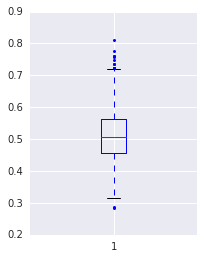

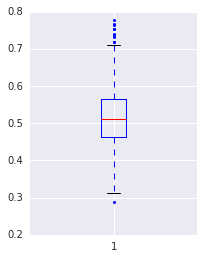

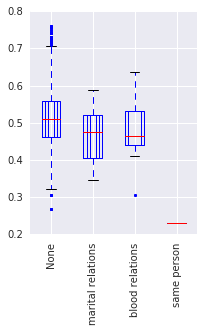

In [62]:
fig,ax=plt.subplots(figsize=(3,4))
scoredList=[]
for n in range(4):
        print n
        scored=Mb_cond_withColors[Mb_cond_withColors['TotalScore']==n]
        if n==0:
            scored=scored.sample(2000)
        scoredList.append(list(scored['dist']))
        plt.boxplot(scoredList,sym='k.')
        plt.xticks([1,2,3,4],['None','marital relations','blood relations','same person'],rotation=90)
plt.show()

In [57]:
stats.kruskal(scoredList[0],scoredList[1],scoredList[2])

KruskalResult(statistic=10.833108618413384, pvalue=0.004442427537768563)

In [ ]:
import seaborn as sns
colorList=['grey','black','blue','red']


# fig, ax = plt.subplots(figsize=(3, 14))
sns.set(style='ticks', context='talk')

for n in range(4):
        print n, colorList[n]
        scored=TCR_cond_withColors[TCR_cond_withColors['TotalScore']==n]
        if n==0:
            frac=0.005
            print 'sampling %s of pairs' %frac
            scored=scored.sample(frac=frac)
#         ax.scatter(x, y, color=colorList[n],alpha=0.2*n+0.1,s=40*n+5)
        fig=sns.swarmplot(scored['dist'],color=colorList[n],alpha=0.2*n+0.1,s=3*n+5)
        if n==3:
            for i,ind in enumerate(scored.index):
                xpoint = scored.loc[ind,'dist']
                ypoint=0.1+0.02*i
#                 ypoint = scored.loc[ind,'dist_Mb']
                samplePair=scored.loc[ind,'samplePair']
                fig.annotate(samplePair,xy=(xpoint,ypoint),xytext=(xpoint,ypoint),fontsize=9)

sns.despine()
plt.show()

In [ ]:
#### generate plot for mB distance only:

### top 100000 seqs. 250 species

In [ ]:
#no sequence filtering, braycurtis


datasetFolder='%s/TCR_real_data/SubSampled9000data_rep2' %MyPath
datasetName='PNP515_ss9000_rep2'
distMetricRA='braycurtis'
topNseqs=100000
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=250
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod)
plt.show()

In [ ]:
#no sequence filtering, jaccard


datasetFolder='%s/TCR_real_data/SubSampled9000data_rep2' %MyPath
datasetName='PNP515_ss9000_rep2'
distMetricRA='jaccard'
topNseqs=100000
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=250
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod)
plt.show()

### top 20 seqs. 20 species

In [ ]:
#no sequence filtering, braycurtis


datasetFolder='%s/TCR_real_data/SubSampled9000data_rep2' %MyPath
datasetName='PNP515_ss9000_rep2'
distMetricRA='braycurtis'
topNseqs=20
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=20
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod)

In [ ]:
#no sequence filtering, jaccard


datasetFolder='%s/TCR_real_data/SubSampled9000data_rep2' %MyPath
datasetName='PNP515_ss9000_rep2'
distMetricRA='jaccard'
topNseqs=20
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=20
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod)

plt.show()

## PNP515:

### no top sequence filter:

loading files:
132355
99681
99681
checking for same-person pairs within the dataset:
the sample pair BD474 and BD840 IS NOT in the dataset
the sample pair BD617 and BD838 are in the dataset
the sample pair BD937 and BD938 IS NOT in the dataset
the sample pair BD705 and BD714 IS NOT in the dataset
   dist_TCR sample1 sample2   dist_Mb    samplePair
0  0.933753     BD1    BD10  0.268982   (BD1, BD10)
1  0.970327     BD1   BD101  0.188633  (BD1, BD101)
2  0.937233     BD1   BD105  0.305714  (BD1, BD105)
3  0.935418     BD1   BD106  0.321190  (BD1, BD106)
4  0.939356     BD1   BD107  0.280123  (BD1, BD107)


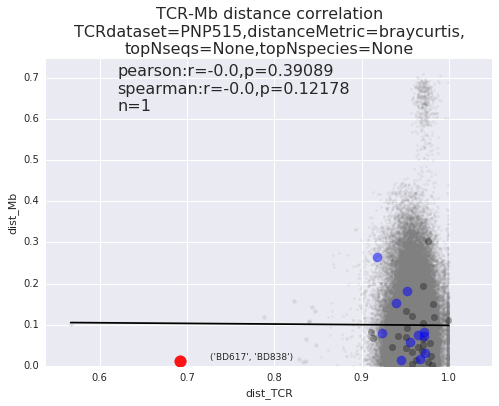

In [31]:
#no sequence filtering, braycurtis


datasetFolder='%s/TCR_real_data' %MyPath
datasetName='PNP515'
distMetricRA='braycurtis'
topNseqs=None
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=None
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod)
plt.show()

loading files:
TCR_cond length before filtering with filteringList is 132355
TCR_cond length After filtering with filteringList is 97903
97903
99681
72390
checking for same-person pairs within the dataset:
the sample pair BD474 and BD840 IS NOT in the dataset
the sample pair BD617 and BD838 are in the dataset
df length before samePerson removal is 72390
df length After samePerson removal is 72389
the sample pair BD937 and BD938 IS NOT in the dataset
the sample pair BD705 and BD714 IS NOT in the dataset
   dist_TCR sample1 sample2   dist_Mb      samplePair
0  0.932822   BD113   BD118  0.065495  (BD113, BD118)
1  0.944083   BD113   BD125  0.141659  (BD113, BD125)
2  0.959994   BD113   BD127  0.133213  (BD113, BD127)
3  0.922604   BD113   BD145  0.028842  (BD113, BD145)
4  0.907569   BD113   BD146  0.038470  (BD113, BD146)


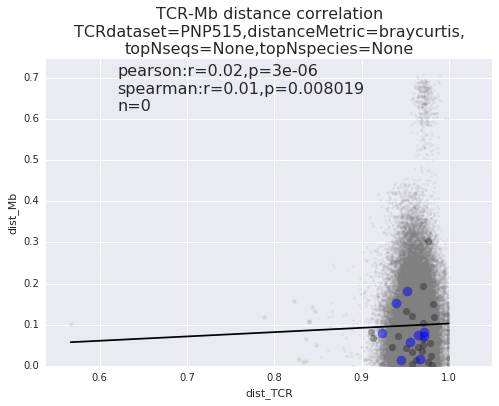

In [32]:
#no sequence filtering, braycurtis, ##### only PNP515MoBio samples, filter out same person


datasetFolder='%s/TCR_real_data' %MyPath
datasetName='PNP515'
distMetricRA='braycurtis'
topNseqs=None
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=None
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,
                                      outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod,removeSamePerson=True,
                                      removeLastSamples=False,filteringList=MoBioSamples,distanceOutlierSTD=None)

# ax.set_xlim(0.85,1)
plt.show()

loading files:
TCR_cond length before filtering with filteringList is 132355
TCR_cond length After filtering with filteringList is 97903
97903
99681
72390
filtering distanceOutliers...
checking for same-person pairs within the dataset:
the sample pair BD474 and BD840 IS NOT in the dataset
the sample pair BD617 and BD838 are in the dataset
df length before samePerson removal is 72390
df length After samePerson removal is 72389
the sample pair BD937 and BD938 IS NOT in the dataset
the sample pair BD705 and BD714 IS NOT in the dataset
   dist_TCR sample1 sample2   dist_Mb      samplePair
0  0.932822   BD113   BD118  0.065495  (BD113, BD118)
1  0.944083   BD113   BD125  0.141659  (BD113, BD125)
2  0.959994   BD113   BD127  0.133213  (BD113, BD127)
3  0.922604   BD113   BD145  0.028842  (BD113, BD145)
4  0.907569   BD113   BD146  0.038470  (BD113, BD146)


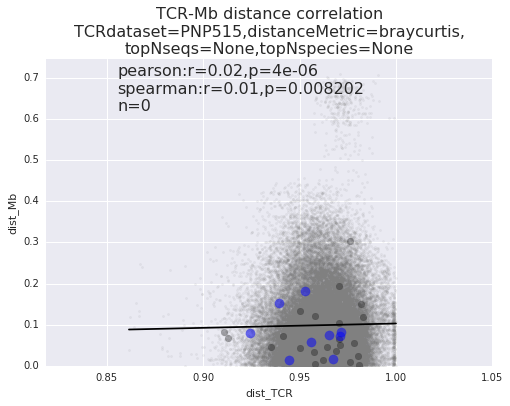

In [33]:
#no sequence filtering, braycurtis, ##### only PNP515MoBio samples, filter out same person


datasetFolder='%s/TCR_real_data' %MyPath
datasetName='PNP515'
distMetricRA='braycurtis'
topNseqs=None
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=None
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,
                                      outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod,removeSamePerson=True,
                                      removeLastSamples=False,filteringList=MoBioSamples,distanceOutlierSTD=7)

# ax.set_xlim(0.85,1)
plt.show()

loading files:
TCR_cond length before filtering with filteringList is 132355
TCR_cond length After filtering with filteringList is 97903
97903
99681
72390
checking for same-person pairs within the dataset:
the sample pair BD474 and BD840 IS NOT in the dataset
the sample pair BD617 and BD838 are in the dataset
df length before samePerson removal is 72390
df length After samePerson removal is 72389
the sample pair BD937 and BD938 IS NOT in the dataset
the sample pair BD705 and BD714 IS NOT in the dataset
   dist_TCR sample1 sample2   dist_Mb      samplePair
0  0.932822   BD113   BD118  0.487395  (BD113, BD118)
1  0.944083   BD113   BD125  0.414414  (BD113, BD125)
2  0.959994   BD113   BD127  0.367521  (BD113, BD127)
3  0.922604   BD113   BD145  0.442478  (BD113, BD145)
4  0.907569   BD113   BD146  0.495868  (BD113, BD146)


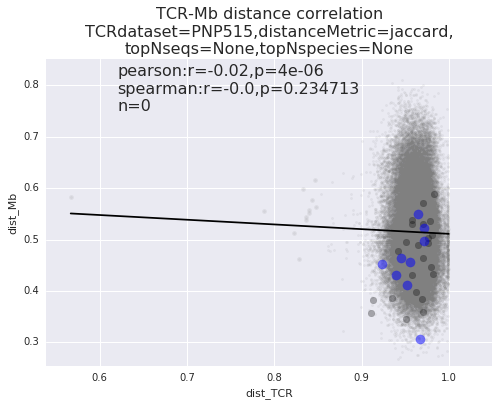

In [34]:
#no sequence filtering, jaccard


datasetFolder='%s/TCR_real_data' %MyPath
datasetName='PNP515'
distMetricRA='jaccard'
topNseqs=None
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=None
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod,removeSamePerson=True,
                                      removeLastSamples=False,filteringList=MoBioSamples)
plt.show()

loading files:
132355
99681
99681
checking for same-person pairs within the dataset:
the sample pair BD474 and BD840 IS NOT in the dataset
the sample pair BD617 and BD838 are in the dataset
the sample pair BD937 and BD938 IS NOT in the dataset
the sample pair BD705 and BD714 IS NOT in the dataset
   dist_TCR sample1 sample2   dist_Mb    samplePair
0  0.933753     BD1    BD10  0.527273   (BD1, BD10)
1  0.970327     BD1   BD101  0.480315  (BD1, BD101)
2  0.937233     BD1   BD105  0.454545  (BD1, BD105)
3  0.935418     BD1   BD106  0.490566  (BD1, BD106)
4  0.939356     BD1   BD107  0.452991  (BD1, BD107)


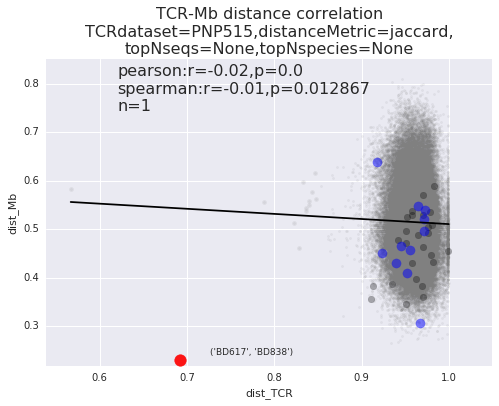

In [35]:
#no sequence filtering, jaccard


datasetFolder='%s/TCR_real_data' %MyPath
datasetName='PNP515'
distMetricRA='jaccard'
topNseqs=None
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=None
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod)
plt.show()

### top 100000 seqs. 250 species

In [ ]:
#no sequence filtering, braycurtis


datasetFolder='%s/TCR_real_data' %MyPath
datasetName='PNP515'
distMetricRA='braycurtis'
topNseqs=100000
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=250
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod)

In [ ]:
#no sequence filtering, jaccard


datasetFolder='%s/TCR_real_data' %MyPath
datasetName='PNP515'
distMetricRA='jaccard'
topNseqs=100000
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=250
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod)

### top 20 seqs. 20 species

In [ ]:
#no sequence filtering, braycurtis


datasetFolder='%s/TCR_real_data' %MyPath
datasetName='PNP515'
distMetricRA='braycurtis'
topNseqs=20
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=20
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod)

In [ ]:
#no sequence filtering, jaccard


datasetFolder='%s/TCR_real_data' %MyPath
datasetName='PNP515'
distMetricRA='jaccard'
topNseqs=20
outlierSTDtcr=None
outlierSTDmb=None
topNspecies=20
libPrepMethod=None



distMatFolderMb='%s/MicrobiomeDataTables/distanceMatrices' %MyPath
distMatFolder='%s/distanceMatrices' %datasetFolder




ax=plot_corr_and_relations_for_TCR_mb(distMatFolderMb,distMatFolder,datasetName,distMetricRA,topNseqs,outlierSTDtcr,outlierSTDmb,
                                       topNspecies,libPrepMethod)